The supply Chain is the network of production and logistics involved in producing and delivering goods to customers. And Supply Chain Analysis means analyzing various components of a Supply Chain to understand how to improve the effectiveness of the Supply Chain to create more value for customers. So, if you want to learn how to analyze the Supply Chain, this article is for you. In this article, I will take you through the task of Supply Chain Analysis using Python.

# Import Libraries

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go

# Load Data & Initial Understanding

In [3]:
df = pd.read_csv("supply_chain_data.csv")
df.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [5]:
df.columns

Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Lead time', 'Production volumes', 'Manufacturing lead time',
       'Manufacturing costs', 'Inspection results', 'Defect rates',
       'Transportation modes', 'Routes', 'Costs'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [11]:
df.shape

(100, 24)

# Check Missing Values

In [13]:
df.isnull().sum()

Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64

# Rename Columns

In [15]:
df.columns = df.columns.str.strip().str.replace(" ", "_").str.lower()

# Remove Redundant Columns

In [19]:
df.drop(columns=['availability', 'order_quantities', 'lead_time'], inplace=True)

✅ Why?

<b>.</b> Avoid duplicated logic

<b>.</b> Reduce model complexity

<b>.</b> Improve dashboard performance

In [24]:
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

In [26]:
cat_cols = df.select_dtypes(include='object').columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

# Fix Data Types

In [40]:
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')

In [42]:
df[cat_cols] = df[cat_cols].astype(str)

# Handle Outliers

In [45]:
def cap_outliers(col):
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return col.clip(lower, upper)

for col in ['shipping_costs','manufacturing_costs','defect_rates','lead_times']:
    df[col] = cap_outliers(df[col])

In [50]:
df.columns

Index(['product_type', 'sku', 'price', 'number_of_products_sold',
       'revenue_generated', 'customer_demographics', 'stock_levels',
       'lead_times', 'shipping_times', 'shipping_carriers', 'shipping_costs',
       'supplier_name', 'location', 'production_volumes',
       'manufacturing_lead_time', 'manufacturing_costs', 'inspection_results',
       'defect_rates', 'transportation_modes', 'routes', 'costs', 'profit'],
      dtype='object')

# Feature Engineering

In [54]:
df['profit'] = df['revenue_generated'] - df['costs']
df['stockout_risk'] = df['stock_levels'] < (df['number_of_products_sold'] / 30)
df['inventory_turnover'] = df['number_of_products_sold'] / df['stock_levels']

In [59]:
df.head()

,product_type,sku,price,number_of_products_sold,revenue_generated,customer_demographics,stock_levels,lead_times,shipping_times,shipping_carriers,...,manufacturing_lead_time,manufacturing_costs,inspection_results,defect_rates,transportation_modes,routes,costs,profit,stockout_risk,inventory_turnover
0,haircare,SKU0,69.808006,802,8661.996792,Non-binary,58,7,4,Carrier B,...,29,46.279879,Pending,0.226410,Road,Route B,187.752075,8474.244717,False,13.827586
1,skincare,SKU1,14.843523,736,7460.900065,Female,53,30,2,Carrier A,...,30,33.616769,Pending,4.854068,Road,Route B,503.065579,6957.834486,False,13.886792
2,haircare,SKU2,11.319683,8,9577.749626,Unknown,1,10,2,Carrier B,...,27,30.688019,Pending,4.580593,Air,Route C,141.920282,9435.829344,False,8.000000
3,skincare,SKU3,61.163343,83,7766.836426,Non-binary,23,13,6,Carrier C,...,18,35.624741,Fail,4.746649,Rail,Route A,254.776159,7512.060266,False,3.608696
4,skincare,SKU4,4.805496,871,2686.505152,Non-binary,5,3,8,Carrier A,...,3,92.065161,Fail,3.145580,Air,Route A,923.440632,1763.064520,True,174.200000


# POWER BI READY OUTPUT

In [62]:
df.to_csv("Supply_chain_bi_data.csv", index=False)

# Exploratory Data Analysis EDA

<b>Now let’s get started with analyzing the Supply Chain by looking at the relationship between the price of the products and the revenue generated by them:</b>

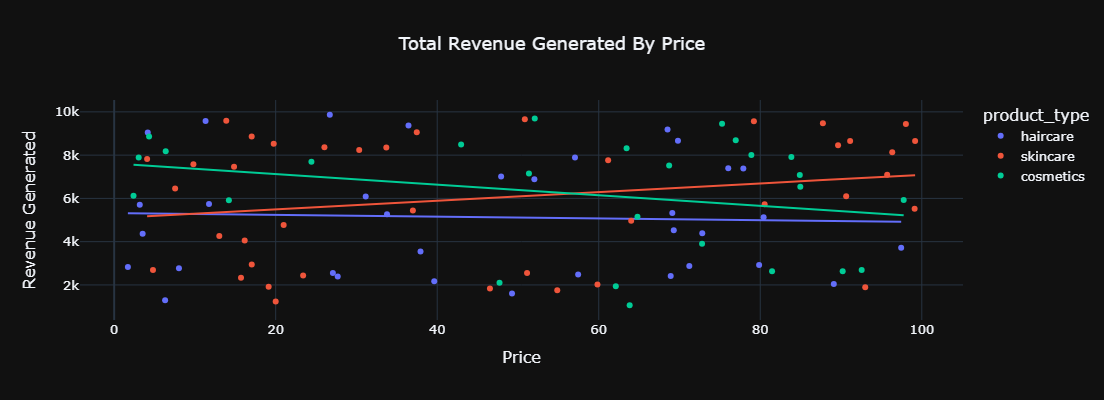

In [134]:
fig = px.scatter(df, x='price', 
                 y='revenue_generated', 
                 color='product_type', 
                 title='Total Revenue Generated By Price',
                 hover_data=['number_of_products_sold'], 
                 trendline="ols")

fig.update_layout(template='plotly_dark',
                  xaxis_title="Price",
                  yaxis_title="Revenue Generated",
                  font=dict(size=13),
                  height=400,
                  width=1050,
                  title_x=0.5,)
fig.show()

<b>Thus, the company derives more revenue from skincare products, and the higher the price of skincare products, the more revenue they generate. Now let’s have a look at the sales by product type:</b>

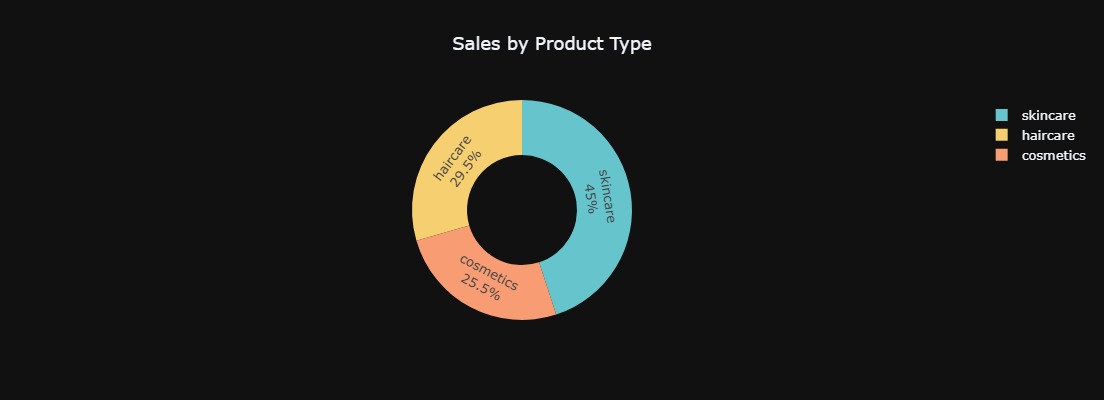

In [136]:
sales_data = df.groupby('product_type')['number_of_products_sold'].sum().reset_index()

pie_chart = px.pie(sales_data, values='number_of_products_sold', names='product_type', 
                   title='Sales by Product Type', 
                   hover_data=['number_of_products_sold'],
                   hole=0.5,
                   color_discrete_sequence=px.colors.qualitative.Pastel)


pie_chart.update_layout(template='plotly_dark',
                  font=dict(size=13),
                  height=400,
                  width=1050,
                  title_x=0.5,)

pie_chart.update_traces(textposition='inside', textinfo='percent+label')
pie_chart.show()

<b>So 45% of the business comes from skincare products, 29.5% from haircare, and 25.5% from cosmetics. Now let’s have a look at the total revenue generated from shipping carriers:</b>

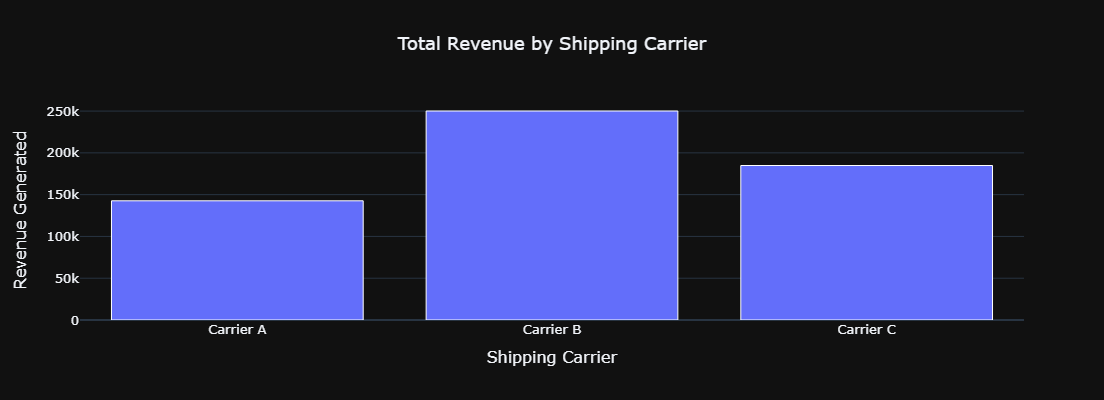

In [404]:
total_revenue = df.groupby('shipping_carriers')['revenue_generated'].sum().reset_index()
fig = go.Figure()
fig.add_trace(go.Bar(x=total_revenue['shipping_carriers'], 
                     y=total_revenue['revenue_generated']))

fig.update_traces(marker_line_width=1, marker_line_color='white')
fig.update_layout(title='Total Revenue by Shipping Carrier', 
                  xaxis_title='Shipping Carrier', 
                  yaxis_title='Revenue Generated',
                  template='plotly_dark',
                  font=dict(size=13),
                  height=400,
                  width=1050,
                  title_x=0.5,)
fig.show()

<b>So the company is using three carriers for transportation, and Carrier B helps the company in generating more revenue. Now let’s have a look at the Average lead time and Average Manufacturing Costs for all products of the company:</b>

In [147]:
avg_lead_time = df.groupby('product_type')['lead_times'].mean().reset_index()
avg_manufacturing_costs = df.groupby('product_type')['manufacturing_costs'].mean().reset_index()
result = pd.merge(avg_lead_time, avg_manufacturing_costs, on='product_type')
result.rename(columns={'Lead time': 'Average Lead Time', 'Manufacturing costs': 'Average Manufacturing Costs'}, inplace=True)

rs = pd.DataFrame(result)
rs

,product_type,lead_times,manufacturing_costs
0,cosmetics,15.384615,43.052740
1,haircare,15.529412,48.457993
2,skincare,16.700000,48.993157


## Analyzing SKUs

<b> There’s a column in the dataset as SKUs. You must have heard it for the very first time. So, SKU stands for Stock Keeping Units. They’re like special codes that help companies keep track of all the different things they have for sale. Imagine you have a large toy store with lots of toys. Each toy is different and has its name and price, but when you want to know how many you have left, you need a way to identify them. So you give each toy a unique code, like a secret number only the store knows. This secret number is called SKU. </b>

<b>I hope you have now understood what SKU. Now lets analyze the revenue generated by each SKU:</b>

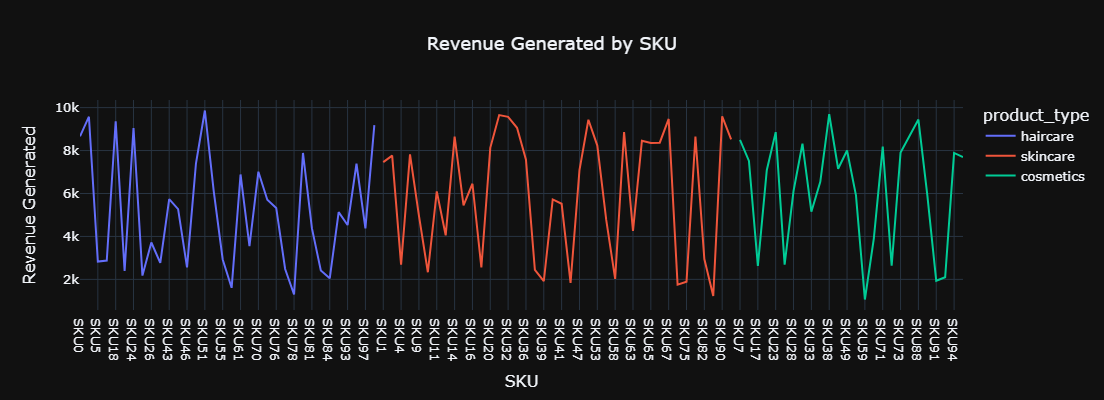

In [183]:
revenue_chart = px.line(df, x='sku', 
                        y='revenue_generated', 
                        title='Revenue Generated by SKU', color='product_type')

revenue_chart.update_layout(title='Revenue Generated by SKU', 
                  xaxis_title='SKU', 
                  yaxis_title='Revenue Generated',
                  template='plotly_dark',
                  font=dict(size=13),
                  height=400,
                  width=1100,
                  title_x=0.5)

revenue_chart.show()

<b> There’s another column in the dataset as Stock levels. Stock levels refer to the number of products a store or business has in its inventory. Now let’s have a look at the stock levels of each SKU: </b>

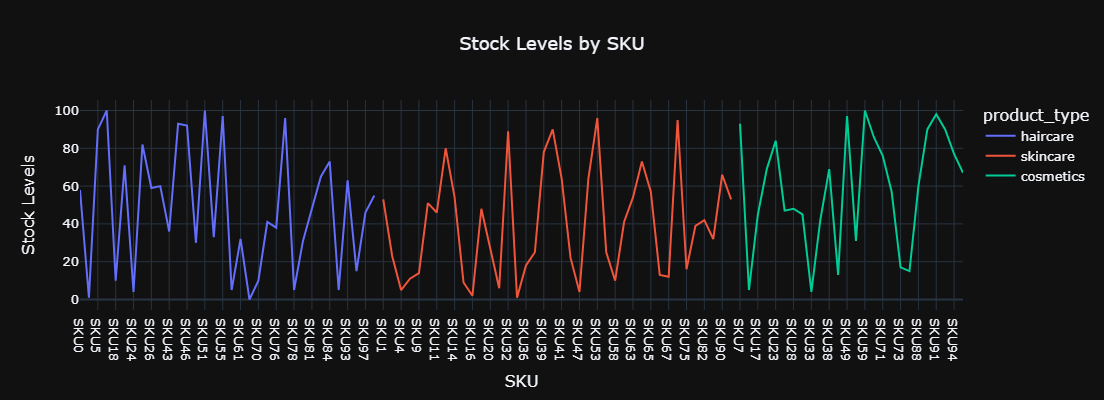

In [212]:
stock_chart = px.line(df, x='sku', 
                      y='stock_levels', 
                      title='Stock Levels by SKU', color='product_type')

stock_chart.update_layout(title='Stock Levels by SKU', 
                  xaxis_title='SKU', 
                  yaxis_title='Stock Levels',
                  template='plotly_dark',
                  font=dict(size=13),
                  height=400,
                  width=1100,
                  title_x=0.5)

stock_chart.show()

<b> Now let’s have a look at the order quantity of each SKU: </b>

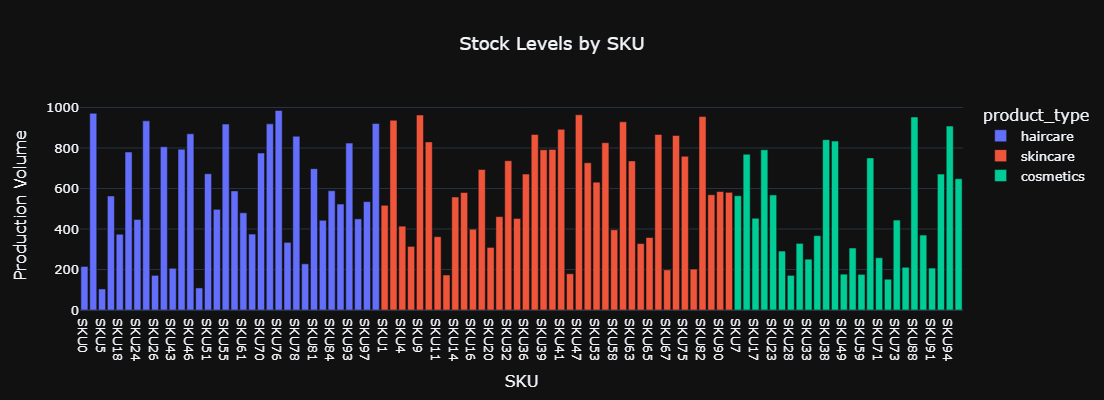

In [220]:
order_quantity_chart = px.bar(df, x='sku', 
                              y='production_volumes', 
                              title='Stock Levels by SKU', color='product_type')

order_quantity_chart.update_layout(title='Stock Levels by SKU', 
                  xaxis_title='SKU', 
                  yaxis_title='Production Volume',
                  template='plotly_dark',
                  font=dict(size=13),
                  height=400,
                  width=1100,
                  title_x=0.5)

order_quantity_chart.show()

## Cost Analysis

<b> Now let’s analyze the shipping cost of Carriers: </b>

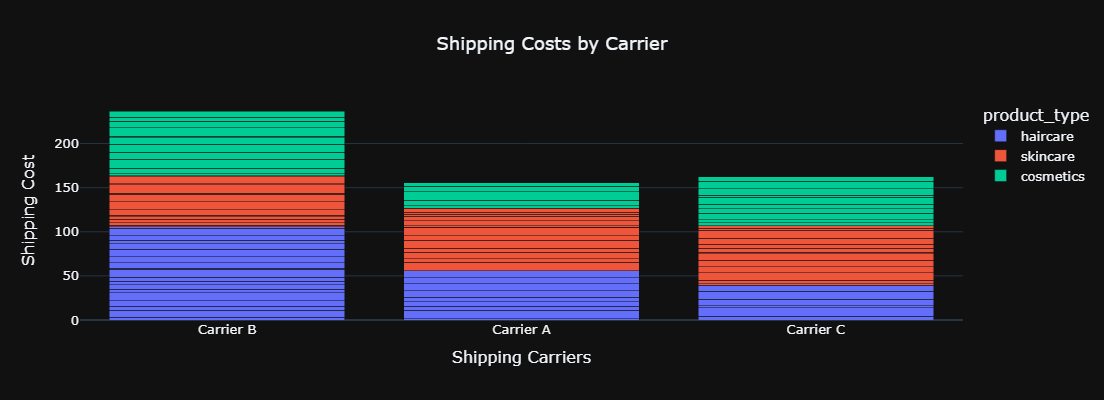

In [240]:
shipping_cost_chart = px.bar(df, x='shipping_carriers', 
                             y='shipping_costs', 
                             title='Shipping Costs by Carrier', barmode='stack', color='product_type')

shipping_cost_chart.update_layout(title='Shipping Costs by Carrier', 
                  xaxis_title='Shipping Carriers', 
                  yaxis_title='Shipping Cost',
                  template='plotly_dark',
                  font=dict(size=13),
                  height=400,
                  width=1100,
                  title_x=0.5)

shipping_cost_chart.show()

<b> In one of the above visualizations, we discovered that Carrier B helps the company in more revenue. It is also the most costly Carrier among the three. Now let’s have a look at the cost distribution by transportation mode: </b>

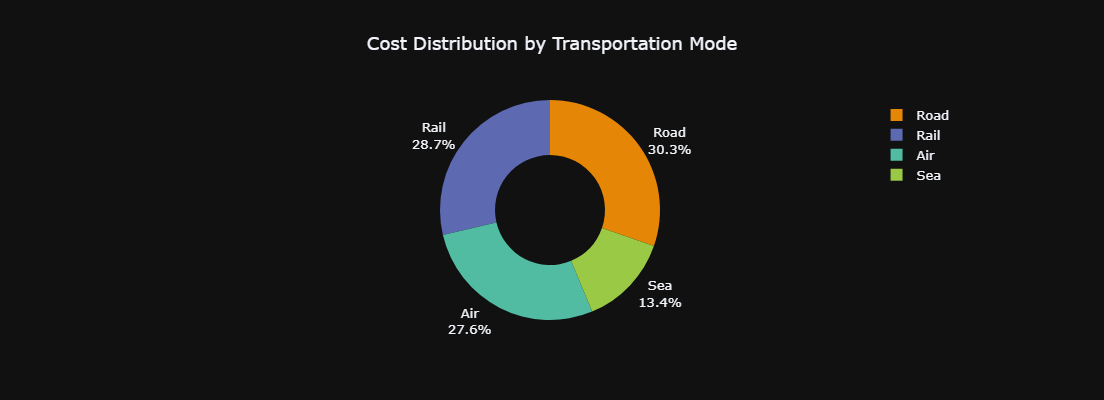

In [253]:
transportation_chart = px.pie(df, 
                              values='costs', 
                              names='transportation_modes', 
                              title='Cost Distribution by Transportation Mode',
                              hole=0.5,
                              color_discrete_sequence=px.colors.qualitative.Vivid)

transportation_chart.update_layout(template='plotly_dark',
                  font=dict(size=13),
                  height=400,
                  width=1050,
                  title_x=0.5,)

transportation_chart.update_traces(textposition='outside', textinfo='percent+label')

transportation_chart.show()

<b> So the company spends more on Road and Rail modes of transportation for the transportation of Goods. </b>

## Analyzing Defect Rate

<b> The defect rate in the supply chain refers to the percentage of products that have something wrong or are found broken after shipping. Let’s have a look at the average defect rate of all product types: </b>

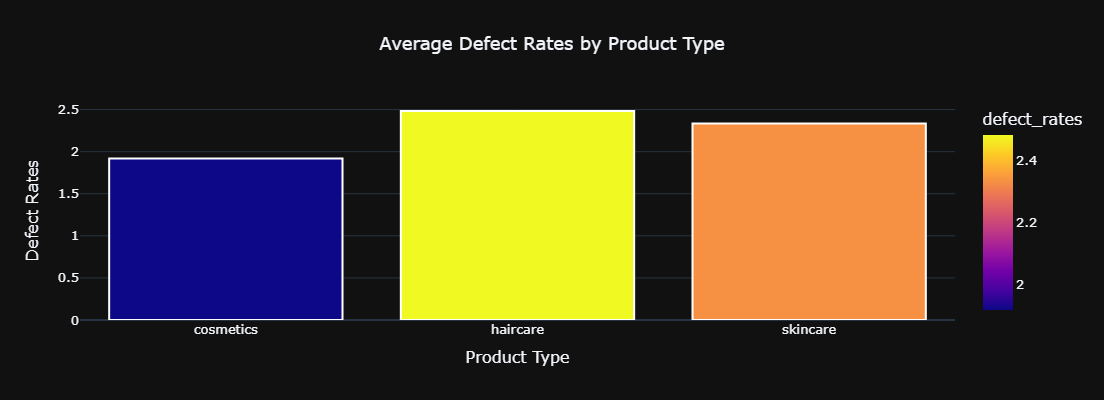

In [270]:
defect_rates_by_product = df.groupby('product_type')['defect_rates'].mean().reset_index()

fig = px.bar(defect_rates_by_product, x='product_type', y='defect_rates',
             title='Average Defect Rates by Product Type', barmode='group', color='defect_rates')

fig.update_traces(marker_line_width=2, marker_line_color='white')
fig.update_layout(title='Average Defect Rates by Product Type', 
                  xaxis_title='Product Type', 
                  yaxis_title='Defect Rates',
                  template='plotly_dark',
                  font=dict(size=13),
                  height=400,
                  width=1100,
                  title_x=0.5)

fig.show()

<b> So the defect rate of haircare products is higher. Now let’s have a look at the defect rates by mode of transportation: </b>

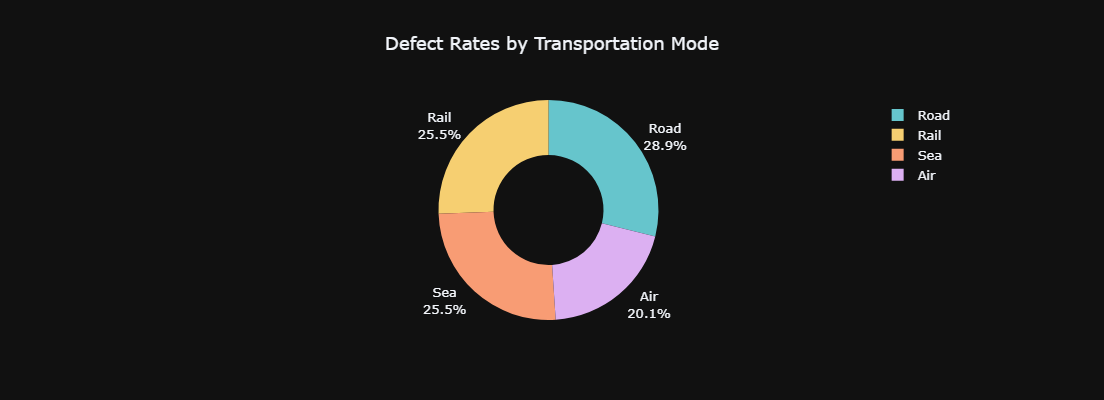

In [275]:
pivot_table = pd.pivot_table(df, values='defect_rates', 
                             index=['transportation_modes'], 
                             aggfunc='mean')

transportation_chart = px.pie(values=pivot_table["defect_rates"], 
                              names=pivot_table.index, 
                              title='Defect Rates by Transportation Mode',
                              hole=0.5,
                              color_discrete_sequence=px.colors.qualitative.Pastel)

transportation_chart.update_layout(template='plotly_dark',
                  font=dict(size=13),
                  height=400,
                  width=1050,
                  title_x=0.5,)

transportation_chart.update_traces(textposition='outside', textinfo='percent+label')
transportation_chart.show()

<b> Road transportation results in a higher defect rate, and Air transportation has the lowest defect rate. </b>

## Stock Levels Distribution

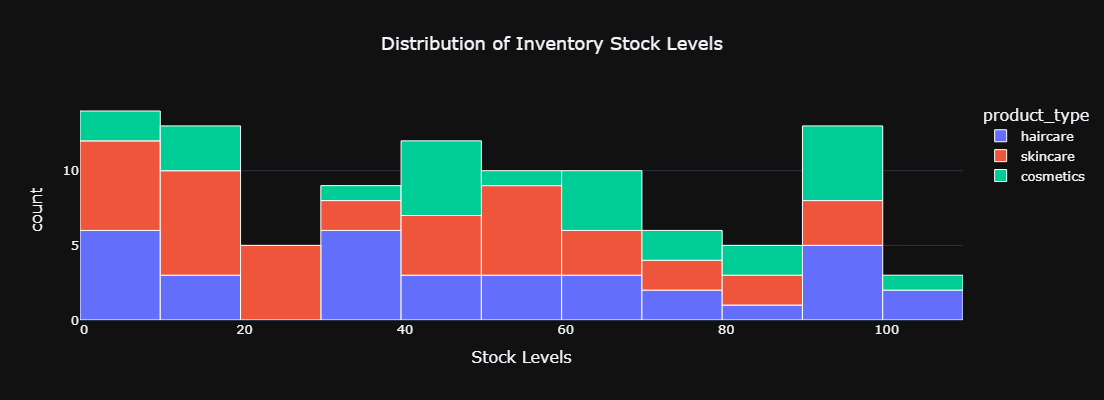

In [291]:
fig = px.histogram(
    df,
    x="stock_levels",
    nbins=20,
    title="Distribution of Inventory Stock Levels",
    labels={"stock_levels": "Stock Levels"}, color='product_type'
)

fig.update_traces(marker_line_width=1, marker_line_color='white')
fig.update_layout(title='Distribution of Inventory Stock Levels', 
                  xaxis_title='Stock Levels', 
                  template='plotly_dark',
                  font=dict(size=13),
                  height=400,
                  width=1100,
                  title_x=0.5)
fig.show()

This plot shows how inventory is distributed across products.

Helps identify overstocked and low-stock items

A large number of low-stock products indicates stockout risk

## Products Sold vs Stock Levels

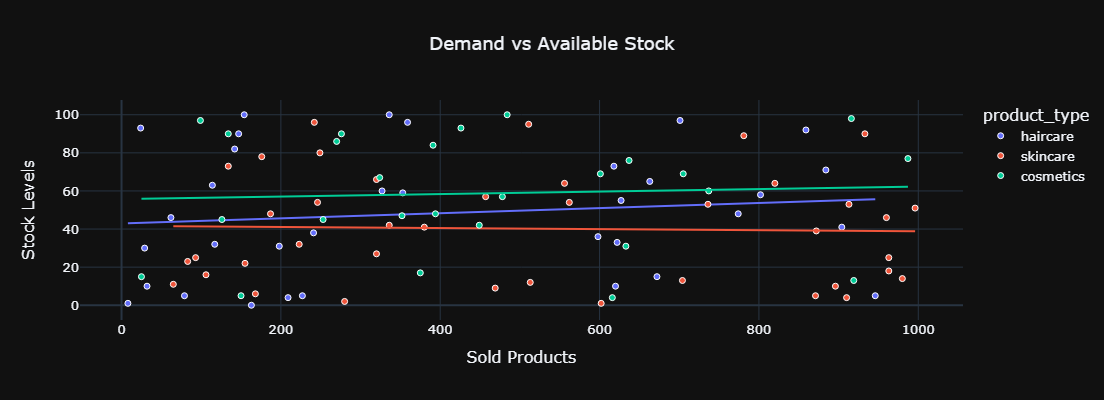

In [406]:
fig = px.scatter(
    df,
    x="number_of_products_sold",
    y="stock_levels",
    color="product_type",
    title="Demand vs Available Stock",
    labels={
        "products_sold": "Products Sold",
        "stock_levels": "Stock Levels"
    },
    trendline='ols'
)

fig.update_traces(marker_line_width=1, marker_line_color='white')
fig.update_layout(title='Demand vs Available Stock', 
                  xaxis_title='Sold Products', 
                  template='plotly_dark',
                  font=dict(size=13),
                  height=400,
                  width=1100,
                  title_x=0.5)

fig.show()

This plot compares demand (sales) with current inventory.

Products with high sales but low stock are at immediate reorder risk

Highlights supply-demand mismatch

## Revenue by Product Type

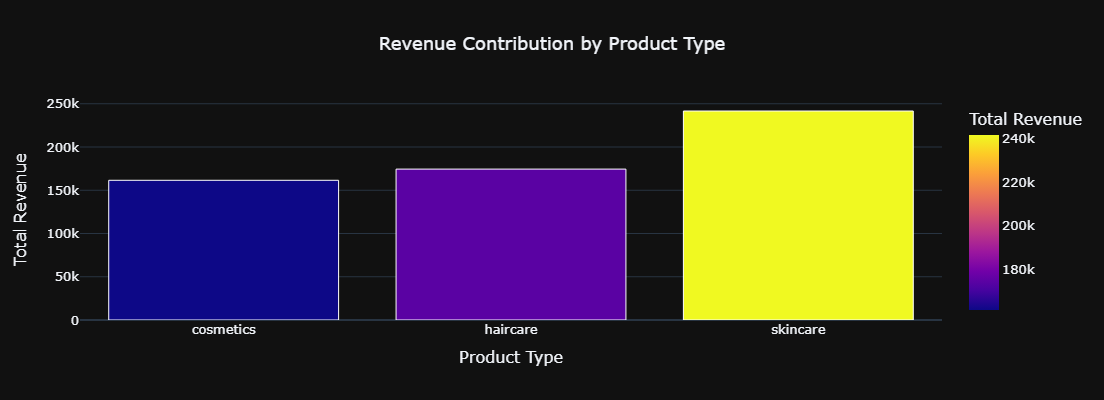

In [314]:
fig = px.bar(
    df.groupby("product_type", as_index=False)["revenue_generated"].sum(),
    x="product_type",
    y="revenue_generated",
    title="Revenue Contribution by Product Type",
    labels={"revenue_generated": "Total Revenue"}, color='revenue_generated'
)

fig.update_traces(marker_line_width=1, marker_line_color='white')
fig.update_layout(title='Revenue Contribution by Product Type', 
                  xaxis_title='Product Type', 
                  template='plotly_dark',
                  font=dict(size=13),
                  height=400,
                  width=1100,
                  title_x=0.5)

fig.show()

This plot identifies which product categories drive revenue.

Helps prioritize inventory investment

High-revenue products should have higher service levels

## Inventory Turnover by Product Type

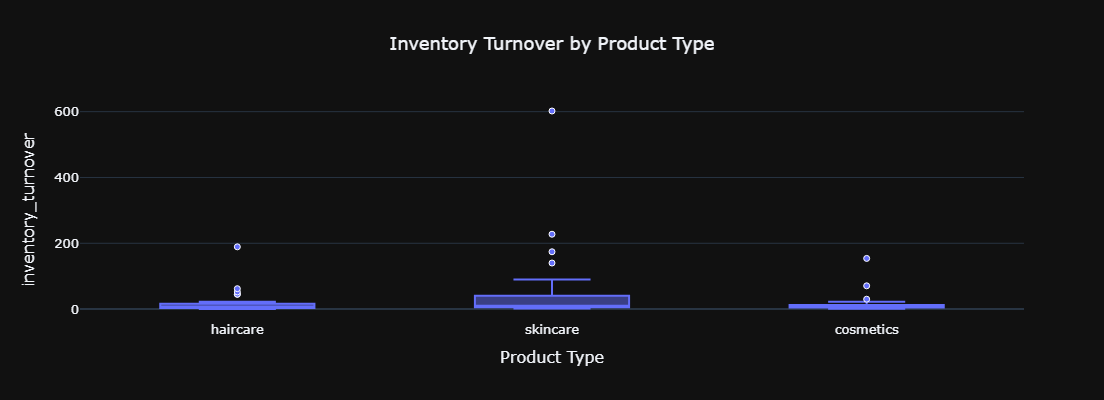

In [322]:
fig = px.box(
    df,
    x="product_type",
    y="inventory_turnover",
    title="Inventory Turnover by Product Type"
)

fig.update_traces(marker_line_width=1, marker_line_color='white')
fig.update_layout(title='Inventory Turnover by Product Type', 
                  xaxis_title='Product Type', 
                  template='plotly_dark',
                  font=dict(size=13),
                  height=400,
                  width=1100,
                  title_x=0.5)

fig.show()

Inventory turnover shows how fast products move.

Low turnover → slow-moving / excess inventory

High turnover → fast-selling products needing frequent replenishment

## Average Lead Time by Supplier

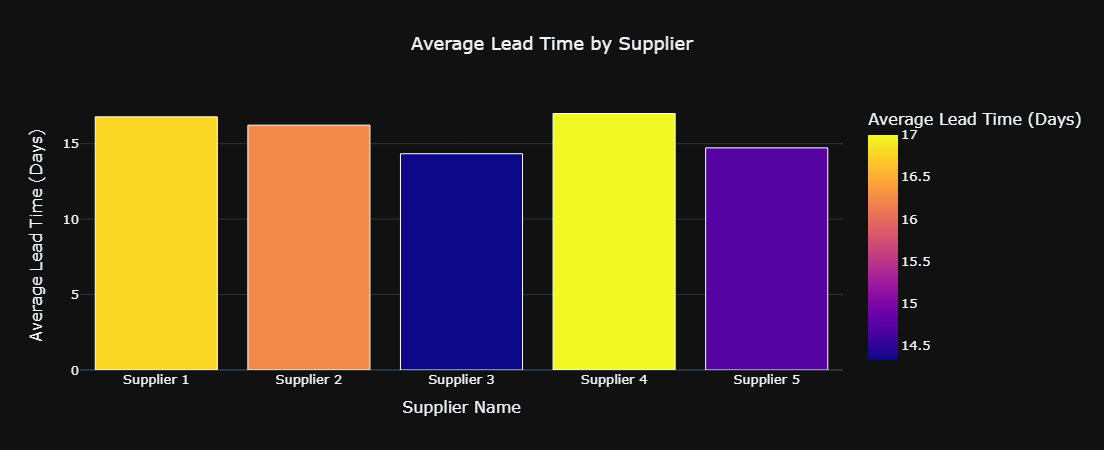

In [346]:
fig = px.bar(
    df.groupby("supplier_name", as_index=False)["lead_times"].mean(),
    x="supplier_name",
    y="lead_times",
    title="Average Lead Time by Supplier",
    labels={"lead_times": "Average Lead Time (Days)"}, color='lead_times'
)

fig.update_traces(marker_line_width=1, marker_line_color='white')
fig.update_layout(title='Average Lead Time by Supplier', 
                  xaxis_title='Supplier Name', 
                  template='plotly_dark',
                  font=dict(size=13),
                  height=450,
                  width=1100,
                  title_x=0.5)

fig.show()

This plot compares supplier efficiency.

Suppliers with higher lead times increase stockout risk

Useful for supplier evaluation and renegotiation

## Cost vs Quality Tradeoff

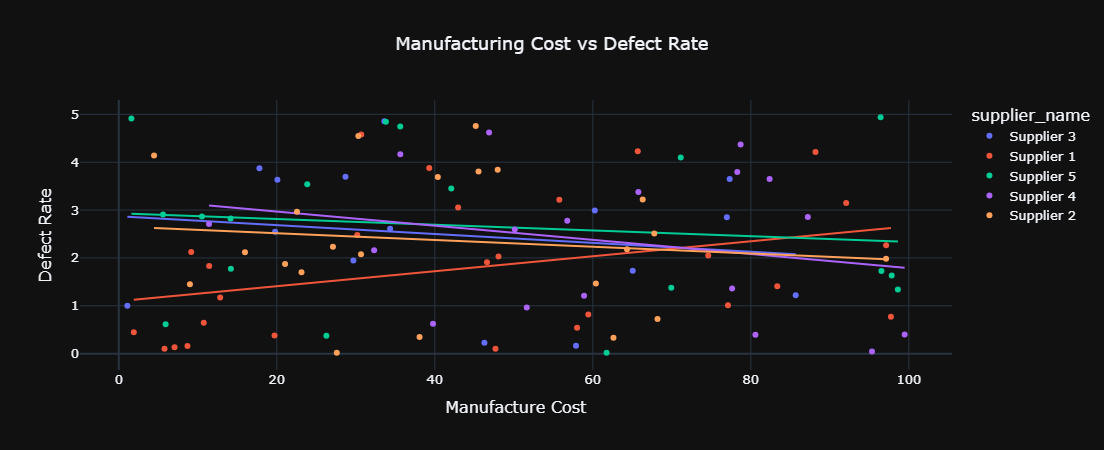

In [408]:
fig = px.scatter(
    df,
    x="manufacturing_costs",
    y="defect_rates",
    color="supplier_name",
    title="Manufacturing Cost vs Defect Rate",
    labels={
        "manufacturing_costs": "Manufacturing Cost",
        "defect_rates": "Defect Rate"
    },
    trendline='ols'
)

fig.update_layout(title='Manufacturing Cost vs Defect Rate', 
                  xaxis_title='Manufacture Cost', 
                  template='plotly_dark',
                  font=dict(size=13),
                  height=450,
                  width=1100,
                  title_x=0.5)

fig.show()

This plot highlights the cost–quality tradeoff.

Low cost but high defects → hidden business risk

Helps identify optimal suppliers

## Logistics Efficiency

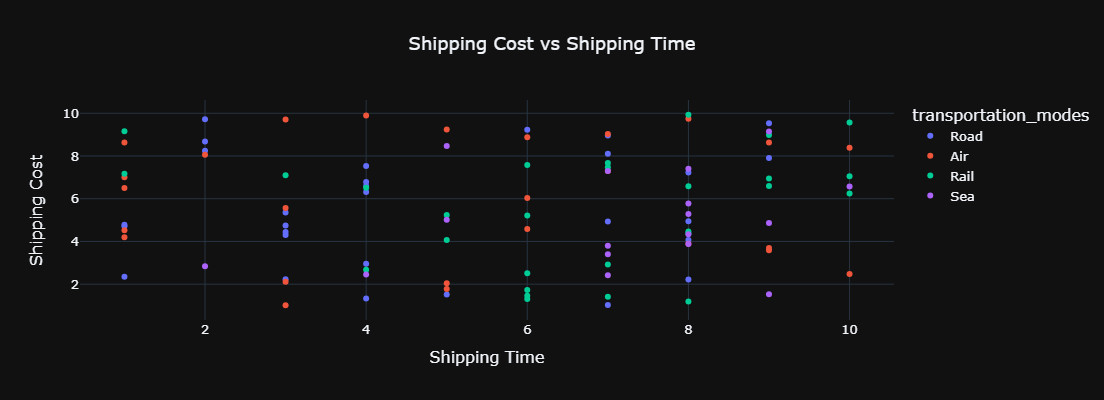

In [366]:
fig = px.scatter(
    df,
    x="shipping_times",
    y="shipping_costs",
    color="transportation_modes",
    title="Shipping Cost vs Shipping Time",
    labels={
        "shipping_times": "Shipping Time (Days)",
        "shipping_costs": "Shipping Cost"
    }
)

fig.update_traces(marker_line_width=1, marker_line_color='white')
fig.update_layout(title='Shipping Cost vs Shipping Time', 
                  xaxis_title='Shipping Time', 
                  template='plotly_dark',
                  font=dict(size=13),
                  height=400,
                  width=1100,
                  title_x=0.5)

fig.show()

This plot evaluates logistics performance.

Faster shipping usually costs more

Helps decide best transportation mode based on urgency vs cost

## Profit by Product Type

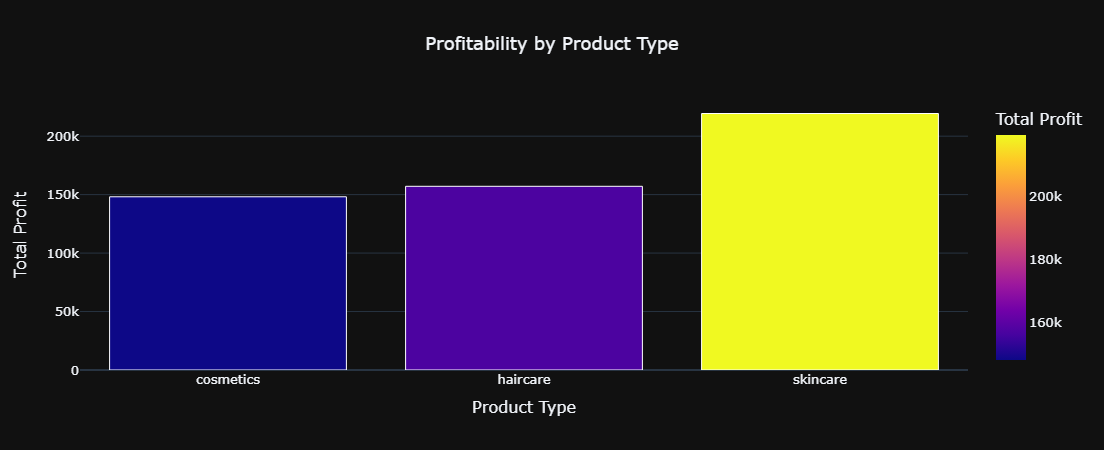

In [384]:
fig = px.bar(
    df.groupby("product_type", as_index=False)["profit"].sum(),
    x="product_type",
    y="profit",
    title="Profitability by Product Type",
    labels={"profit": "Total Profit"}, color="profit"
)

fig.update_traces(marker_line_width=1, marker_line_color='white')
fig.update_layout(title='Profitability by Product Type', 
                  xaxis_title='Product Type', 
                  template='plotly_dark',
                  font=dict(size=13),
                  height=450,
                  width=1100,
                  title_x=0.5)

fig.show()

This plot separates revenue from actual profit.

Some products may sell well but yield low profit

Useful for pricing and cost-optimization decisions

## Stockout Risk Count

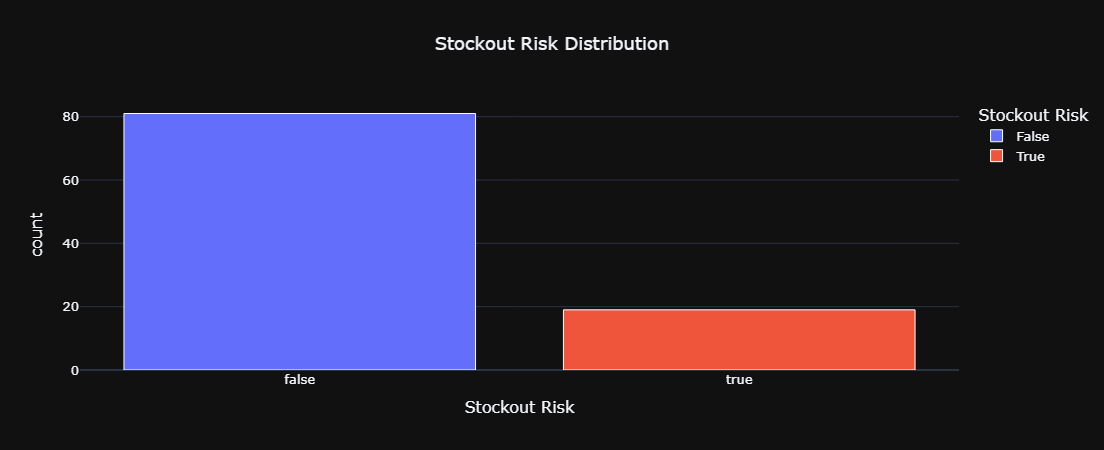

In [397]:
fig = px.histogram(
    df,
    x="stockout_risk",
    title="Stockout Risk Distribution",
    labels={"stockout_risk": "Stockout Risk"}, color='stockout_risk'
)

fig.update_traces(marker_line_width=1, marker_line_color='white')
fig.update_layout(title='Stockout Risk Distribution', 
                  xaxis_title='Stockout Risk', 
                  template='plotly_dark',
                  font=dict(size=13),
                  height=450,
                  width=1100,
                  title_x=0.5)
fig.show()

This plot highlights how many products are at risk of stockouts.

Supports proactive inventory planning

Direct input for reorder decisions

### These insights directly support inventory optimization and supply chain decision-making.